In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Practica 2 Calculando pi con gotas de lluvia

In [162]:
def simular_gotas_lluvia(gotas, n=100, r=1):
    """Simula las gotas de lluvia para calcular $\pi$

    Parámetros
    ----------
    gotas: ndarray nx2
        Matriz que representan las coordenadas de las gotas
    n: int
        Es el número de gotas a simular
    r: int
        El radio del circulo centrado en 0.
    
    Retorna
    n_gotas_circulo: int
        Cantidad de gotas que cayeron en el circulo
    """
    n_gotas_circulo = 0.    
    for x, y in gotas:
        # Region del circulo esta definida como: x^2 + y^2 <= r^2
        if x**2 + y**2 <= r**2:
            n_gotas_circulo += 1  
    return n_gotas_circulo    

In [331]:
rng = np.random.default_rng()
total_gotas = 1000
gotas_lluvia = rng.uniform(low=0, high=1, size=(total_gotas,2))
aprox_pi = 4 * (simular_gotas_lluvia(gotas_lluvia, total_gotas) / total_gotas)
print(f'Aproximacion de pi: {aprox_pi}')

Aproximacion de pi: 3.132


## Aproximaciones

In [211]:
aproxis_pi = []
x_inf = 1
x_sup = 1000
step = 5
for total_gotas in range(x_inf, x_sup, step):
    gotas_lluvia = rng.uniform(low=0, high=1, size=(total_gotas,2))
    aproxis_pi.append(4 * (simular_gotas_lluvia(gotas_lluvia, total_gotas) / total_gotas))    

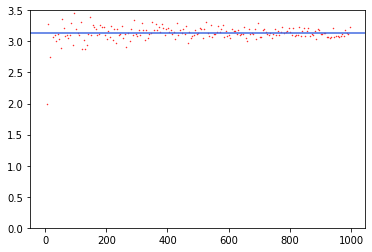

In [212]:
plt.ylim(0, 3.5)
plt.axhline(y=3.1416, color='royalblue', linestyle='-')
plt.scatter(np.arange(x_inf,x_sup, step),aproxis_pi, s=0.2, c='r') 
#plt.plot(np.arange(x_inf,x_sup),aproxis_pi, 'ro',markersize=0.5) 

## Monte carlo animation

Para hacer nuestra simulación primero dibujares nuestro circulo que esta definido matematicamente como:

$$ x^2 + y^2 = r^2 $$

Para poder dibujarlo en matplotlib despejemos $y$ para poder dejarlo en función de $x$ y de este modo poder generar las coordenadas:


$$y^2 = r^2 - x^2 \\ y = \pm \sqrt{r^2 - x^2}$$



In [328]:
# Creamos nuestro canvas
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
r = 1

# Dibujamos primero la parte del circulo
x = np.linspace(-r, r, 1000)
y = lambda x, r: np.sqrt(r**2 - x**2)
ax1.plot(x, y(x, 1), color='royalblue')
ax1.plot(x, -y(x, 1), color='royalblue')

# Creamos los componente de scatter plot
points = np.array([np.nan, np.nan])
txt_title_scat1 = ax1.set_title("Simulación de Montecarlo")
scat = ax1.scatter([], [], c='r', s=5)

# En nuestro segundo supplot dibujamos las
# aproximaciones a $pi$
aproxs = np.array([np.nan, np.nan])
ax2.axhline(y=3.1416, color='royalblue', linestyle='-')
txt_title_scat2 = ax2.set_title("Aproximaciones de $\pi$") 
scat2 = ax2.scatter([],[], c='r', s=5)


gotas = 200

def init():    
    ax1.set_xlim(-1.2, 1.2)
    ax1.set_ylim(-1.2, 1.2)
        
    ax2.set_ylim(-0.1, 3.6)    
    ax2.set_xlim(0, gotas+4)  

    return scat,

def update(frame):
    global points
    global aproxs
    total_gotas = frame+1
    # Simulación de Montecarlo
    random_point = np.random.uniform(low=-1, high=1, size=2)    
    points = np.vstack((points, random_point)) # Dim Nx2    
    txt_title_scat1.set_text(f'Simulación de Montecarlo  Total de gotas={total_gotas}')
    scat.set_offsets(points)

    # Aproximaciones al $\pi$
    aprox_pi = 4 * (simular_gotas_lluvia(points, total_gotas) / total_gotas)    
    txt_title_scat2.set_text(f'Aproximaciones de $\pi$={aprox_pi:.4f}')    
    aprox = np.array([total_gotas, aprox_pi])
    aproxs = np.vstack((aproxs, aprox))    
    #print(aproxs)
    scat2.set_offsets(aproxs)

    return scat, scat2

anim = FuncAnimation(fig, update, frames=gotas, init_func=init,
                     blit=True)
#anim.save('montecarlo-pi-200.gif', writer='pillow')
plt.close()

In [329]:
HTML(anim.to_html5_video())